# Digit Recognition

**Goal**: Our goal is to develop a model to recognize handwritten digits.

**Data**: We shall use the *Keras* *MNIST* dataset (https://keras.io/api/datasets/mnist/) to train and evaluate our models. The dataset contains  $28\times28$ grayscale images of handwritten digits; each image is labeled with the digit (**0,...,9**) that it represents. There are 60,000 training samples and 10,000 test samples.    

**Approach**: We shall choose a good model for this digit recognition task based on results from *k*-fold cross-validation on the 60,000 training samples. The selected model will be evaluated on the 10,000 test samples. We shall then use the trained model to classify unlabeled images and see whether it can recognize our own handwriting.



## Import modules

In [1]:
from keras.datasets import mnist # to obtain labeled images

import pandas as pd # for data handling
import numpy as np # for computation
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.metrics import accuracy_score, classification_report # evaluation metrics
from sklearn.metrics import confusion_matrix # for confusion matrix
import matplotlib.pyplot as plt # for plotting

# scikit-learn classifiers evaluated (change as desired)
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Get MNIST data
We shall use the *MNIST* *load_data* function to load labeled images of digits from *keras.datasets* (https://keras.io/api/datasets/mnist/) into the following *NumPy* arrays:
- *x_train* and *x_test*: contain 60,000 images for training and 10,000 images testing, respectively. Each image is a $28\times28$ array of grayscale values (between 0 and 255).
- *y_train* and *y_test*: contain corresponding labels (digits between **0** and **9**) for the training and test samples, respectively.



In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape of arrays:')
print(f'  x_train: {x_train.shape},   y_train: {y_train.shape}')
print(f'  x_test: {x_test.shape},   y_test: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of arrays:
  x_train: (60000, 28, 28),   y_train: (60000,)
  x_test: (10000, 28, 28),   y_test: (10000,)


## Display image
We can use the *imshow* function of *pyplot* to display images of digits

Image in x_train[12345] is labeled 3


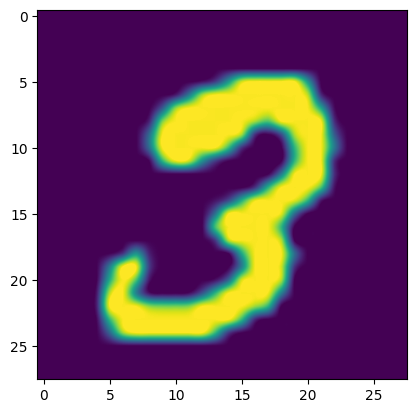

In [5]:
k = 12345 # # specify k and display k-th labeled training image
image, label = x_train[k], y_train[k]
plt.imshow(image,  interpolation='spline16')
print(f'Image in x_train[{k}] is labeled {label}')

Image in x_test[27] is labeled 4


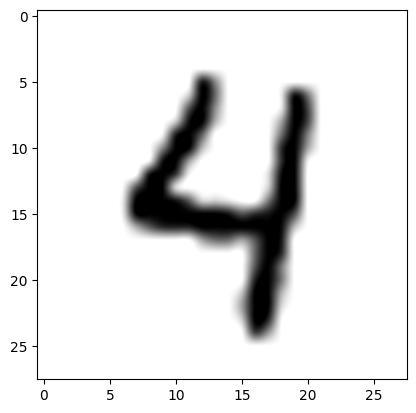

In [4]:
k = 27
 # specify k and display k-th labeled test image
image, label = x_test[k], y_test[k]
plt.imshow(image, cmap='gray_r', interpolation='spline16')
print(f'Image in x_test[{k}] is labeled {label}')

## Specify inputs and outputs

Each training and test sample is a ***2-dimensional*** array of size $28\times28$. To use each sample as an input for a *Scikit-Learn* classifier, we must convert it to a ***1-dimensional*** array with $28\times28=784$ input features representing grayscale values of pixels.

The function ***to1D*** is used to reshape training and test inputs. It also
converts grayscale values between 0 and 255 to a real number between 0 and 1.

- **X_train**: $60,000 \times 784$ array containing input values for training samples.
- **y_train**: Array containing labels for the 60,000 training samples.
- **X_test**: $10,000 \times 784$ array containing input values for test samples.
- **y_test**: Array containing labels for the 10,000 training samples.







In [7]:
def to1D(x):
    """Returns normalized array with N rows and 784 columns,
       given array x with N 28x28 images"""
    return x.reshape(-1, 28*28)/255.0

X_train, X_test = to1D(x_train), to1D(x_test)
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

Shapes:
X_train: (60000, 784), X_test: (10000, 784)
y_train: (60000,), y_test: (10000,)


## Evaluate models using *k*-fold cross-validation
We shall use **4**-fold cross-validation so that 45,000 of the 60,000 training samples are used for training and the remaining 15,000 samples are used for validation in each fold. The mean cross-validation accuracy for each model with chosen hyper-parameters on the 4 runs will be computed using the command:
- **score = cross_val_score(model, X_train, y_train, cv=4).mean()**
> - model: classifier object with specified hyperparameters
> - X_train, y_train: Inputs and output labels for training
> - cv: number of folds in cross-validation
> - mean(): computes mean accuracy from the *cv* runs

You can look up the documentation for each classifier, change hyper-parameter values, and observe the results. We shall also observe the time it takes to train and evaluate each model 4 times in this process.


### MultinomialNB

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [8]:
%%time
model = MultinomialNB() # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.8227
CPU times: user 3.26 s, sys: 2.09 s, total: 5.35 s
Wall time: 7.31 s


### DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [9]:
%%time
model = DecisionTreeClassifier() # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.8625
CPU times: user 1min 14s, sys: 815 ms, total: 1min 15s
Wall time: 1min 15s


### ExtraTreesClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [10]:
%%time
model = ExtraTreesClassifier() # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.9693
CPU times: user 2min 2s, sys: 1.13 s, total: 2min 3s
Wall time: 2min 4s


### KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
%%time
model = KNeighborsClassifier() # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.9684
CPU times: user 2min 37s, sys: 501 ms, total: 2min 38s
Wall time: 2min 39s


In [12]:
%%time
for k in [3, 7, 11, 15]:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with n_neighbors = {k}: {score:0.4f}')

Mean cross-validation accuracy with n_neighbors = 3: 0.9694
Mean cross-validation accuracy with n_neighbors = 7: 0.9671
Mean cross-validation accuracy with n_neighbors = 11: 0.9641
Mean cross-validation accuracy with n_neighbors = 15: 0.9615
CPU times: user 10min 32s, sys: 2.15 s, total: 10min 34s
Wall time: 10min 36s


In [13]:
%%time
for k in range(1, 6, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with n_neighbors = {k}: {score:0.4f}')

Mean cross-validation accuracy with n_neighbors = 1: 0.9685
Mean cross-validation accuracy with n_neighbors = 3: 0.9694
Mean cross-validation accuracy with n_neighbors = 5: 0.9684
CPU times: user 7min 52s, sys: 1.53 s, total: 7min 53s
Wall time: 7min 55s


### SVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
%%time
model = SVC() # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.9763
CPU times: user 22min 46s, sys: 2.39 s, total: 22min 49s
Wall time: 22min 52s


### MLPClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [15]:
%%time
model = MLPClassifier(hidden_layer_sizes=400) # change hyperparameters as desired
score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Mean cross-validation accuracy = 0.9803
CPU times: user 23min 50s, sys: 2.9 s, total: 23min 53s
Wall time: 13min 41s


## Select a good model
Since MLPClassifier has high cross-validation accuracy, we shall search for good hyper-parameter values for a MLPClassifier model using cross-validation. In this example I shall vary *hidden_layer_sizes*.

In [16]:
%%time
for h in [100, 500]: # number of neurons in hidden layer
    model = MLPClassifier(hidden_layer_sizes=h, max_iter=1000)
    score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with hidden_layer_sizes = {h}: {score:0.4f}')

Mean cross-validation accuracy with hidden_layer_sizes = 100: 0.9732
Mean cross-validation accuracy with hidden_layer_sizes = 500: 0.9800
CPU times: user 37min 32s, sys: 4.83 s, total: 37min 37s
Wall time: 21min 36s


For this classification problem, we shall choose:
- MLPClassifier(hidden_layer_sizes=500)

In [17]:
chosen_model = MLPClassifier(hidden_layer_sizes=500, verbose=True) # chosen model
print(chosen_model) # display model parameters

MLPClassifier(hidden_layer_sizes=500, verbose=True)


## Train and test selected model

In [18]:
%%time
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples
predicted = chosen_model.predict(X_test) # predicted churn for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places

Iteration 1, loss = 0.30572290
Iteration 2, loss = 0.12951159
Iteration 3, loss = 0.08701977
Iteration 4, loss = 0.06198692
Iteration 5, loss = 0.04696001
Iteration 6, loss = 0.03543748
Iteration 7, loss = 0.02879315
Iteration 8, loss = 0.02217137
Iteration 9, loss = 0.01817330
Iteration 10, loss = 0.01341577
Iteration 11, loss = 0.00997838
Iteration 12, loss = 0.00763662
Iteration 13, loss = 0.00658154
Iteration 14, loss = 0.00462725
Iteration 15, loss = 0.00484058
Iteration 16, loss = 0.00362972
Iteration 17, loss = 0.00285565
Iteration 18, loss = 0.00243412
Iteration 19, loss = 0.01375143
Iteration 20, loss = 0.00837492
Iteration 21, loss = 0.00674876
Iteration 22, loss = 0.00200129
Iteration 23, loss = 0.00130027
Iteration 24, loss = 0.00111523
Iteration 25, loss = 0.00104362
Iteration 26, loss = 0.00099719
Iteration 27, loss = 0.00096262
Iteration 28, loss = 0.00093281
Iteration 29, loss = 0.00091535
Iteration 30, loss = 0.00086943
Iteration 31, loss = 0.00084760
Iteration 32, los

## Predict class for unlabeled samples
We shall use our trained model to predict the output class for the unlabeled samples.

In [20]:
filename = '/content/sample_data/digit.new.csv'
new = pd.read_csv(filename) # read data into dataframe
print(f'Shape of new: {new.shape}')
new.head() # show first 5 rows

Shape of new: (30, 785)


,ID,pix001,pix002,pix003,pix004,pix005,pix006,pix007,pix008,pix009,...,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783,pix784
0,ID_01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
features = list(new)[1:] # all but the fits column are input features (pixel values)
new_labels = chosen_model.predict(new[features].values/255.0) # predicted labels using normalized pixel values
new_df = pd.DataFrame() # dataframe with predicted digits for unlabeled images
new_df['ID'] = new.ID # ID for unlabeled images
new_df['digit'] = new_labels # predicted labels for unlabeled images
new_df.to_csv('new_digits.csv', index=False)
new_df # show predicted labels

,ID,digit
0,ID_01,2
1,ID_02,6
2,ID_03,7
3,ID_04,1
4,ID_05,8
5,ID_06,3
6,ID_07,0
7,ID_08,3
8,ID_09,4
9,ID_10,3


## Other stuff
You do not need to do what follows but it may help you understand the model's performance on this image recognition task.

### Display unlabeled images
We shall display the unlabeled images along with our model's prediction.


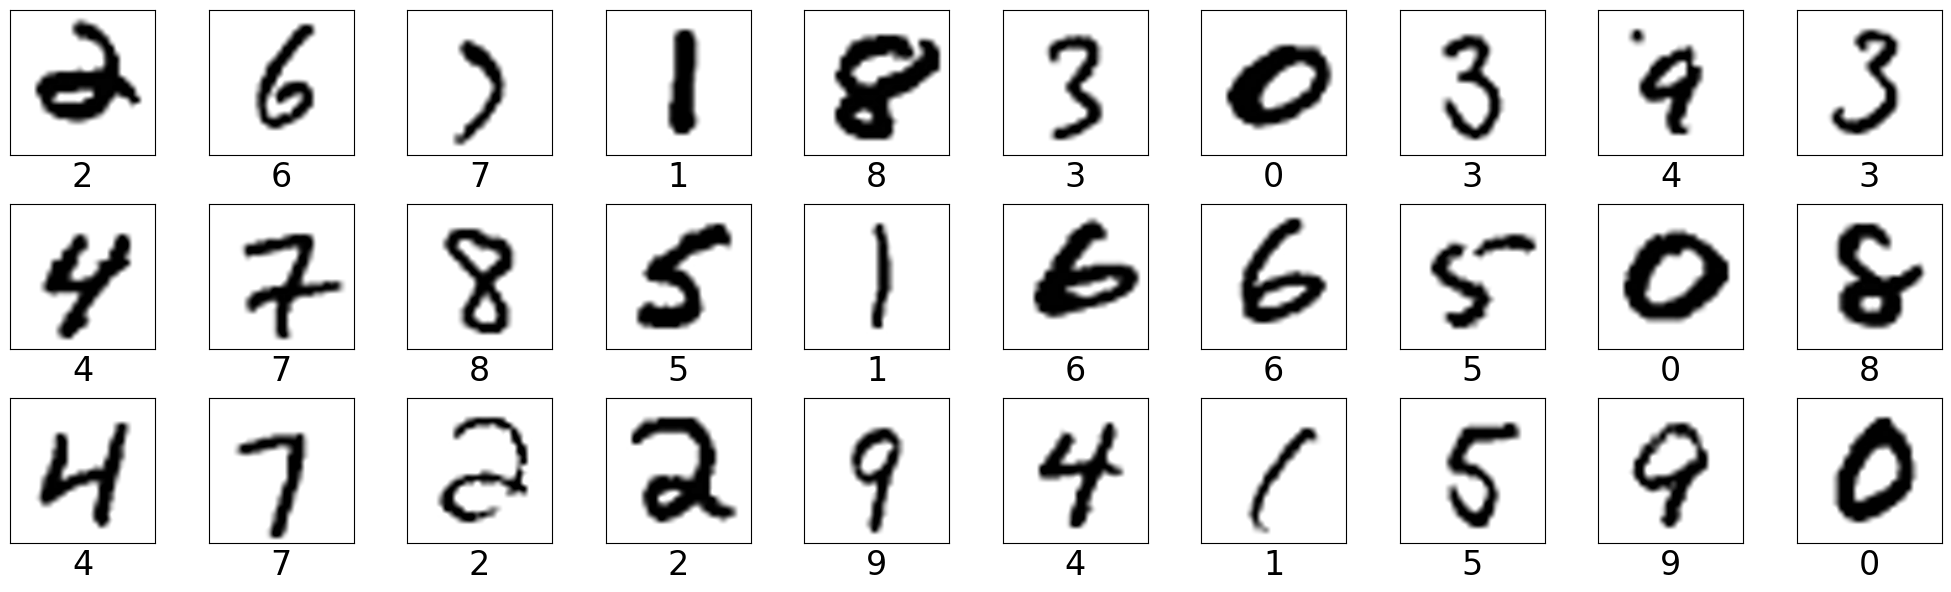

In [22]:
def displayDigits(images, labels, nCols=5):
    """Displays images with labels (nCols per row)
    - images: list of vectors with 784 (28x28) grayscale values
    - labels: list of labels for images"""
    nRows = np.ceil(len(labels)/nCols).astype('int') # number of rows
    plt.figure(figsize=(2*nCols,2*nRows)) # figure size
    for i in range(len(labels)):
        plt.subplot(nRows,nCols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], interpolation='spline16', cmap='gray_r')
        plt.xlabel(str(labels[i]), fontsize=24)
    plt.tight_layout()
    plt.show()
    return

images = new[features].values.reshape(-1, 28, 28) # reshape as 28 x 28 images
labels = new_labels # predicted labels for unlabeled images
displayDigits(images, labels, 10) # display images with predicted labels

## Predict your own handwriting
We can use the model to predict our own handwritten digits.

In [23]:
# https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Predict digit</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def predictImage(model, infile):
    img = PIL.Image.open(infile).resize((20,20))
    img = np.array(img).mean(axis=2)
    m = img.max()
    img = img*255/m
    a = np.zeros((28,28))
    a[4:4+20,4:4+20] = img
    x = np.array([a]).reshape((1,28*28))/255.0
    digit = model.predict(x)[0] # predicted digit
    conf = model.predict_proba(x)[0].max() # confidence in prediction
    print(f'Predicted digit {digit}, Confidence = {conf:0.2f}')
    return

def draw(model, filename='digit.png', w=200, h=200, line_width=20):
    print("Draw a digit in the box below and click the 'Predict digit' button")
    display(HTML(canvas_html % (w, h, line_width)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return predictImage(model, filename)

In [29]:
draw(chosen_model) # predict with chosen_model

Draw a digit in the box below and click the 'Predict digit' button


Predicted digit 8, Confidence = 0.84
